In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib as pt
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
print("Tensorflow: " + tf.__version__)
print("-------------------------------\n")
print("Numpy: " + np.__version__)
print("-------------------------------\n")
print("Matplotlib: " + pt.__version__)
print("-------------------------------")

Tensorflow: 2.2.0
-------------------------------

Numpy: 1.18.5
-------------------------------

Matplotlib: 3.2.2
-------------------------------


In [3]:
# load mnist data set

mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print("The pixcel size for the each image in MNIST is: 28 x 28 ")
print("-----------------------------------------------------------------\n")

print("Total number of the training dataset and the pixel size: " + str(len(train_images)))
print("-----------------------------------------------------------------\n")

print("Total number of the testing dataset and the pixel size: " + str(len(test_images)))
print("-----------------------------------------------------------------")

The pixcel size for the each image in MNIST is: 28 x 28 
-----------------------------------------------------------------

Total number of the training dataset and the pixel size: 60000
-----------------------------------------------------------------

Total number of the testing dataset and the pixel size: 10000
-----------------------------------------------------------------


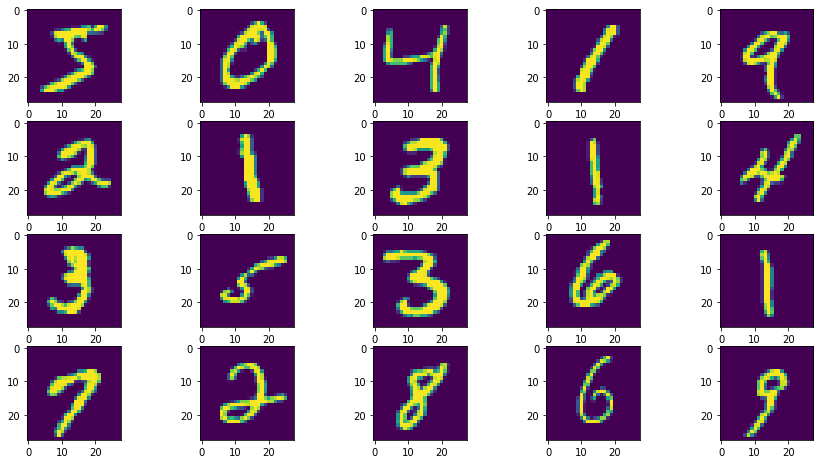

In [5]:
#now we will see the dataset images

plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(train_images[i])
plt.show()

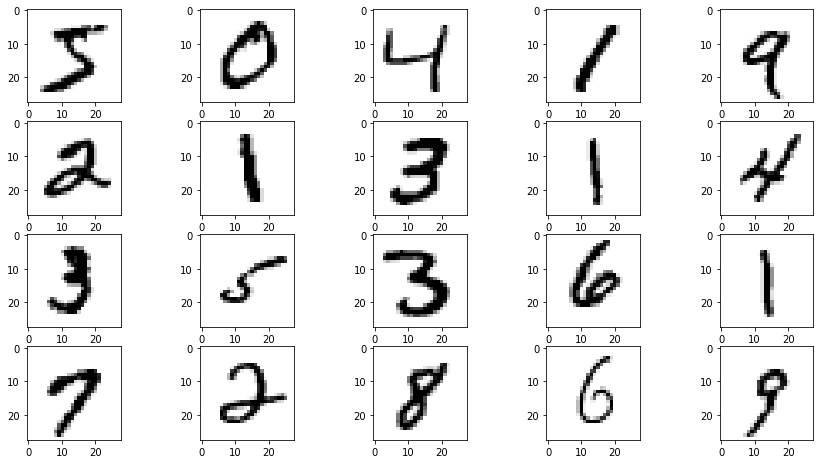

In [6]:
# now we wil convert the images to binary

plt.figure(figsize=(15, 10))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
plt.show()

In [7]:
#the image values are in 255 so we  will change it to value 0 and 1

train_images = train_images / 255.0

test_images = test_images / 255.0

In [8]:
#We are creating the layer for predicting the model and by using the model.summary() function we will tell about the summary of our model as what are all the layers are used in this model


In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
# we are using adam optimizer for updating the weight in the layer

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
#By using model.fit() model we are going to train the model and we can save the model by using the model.save function()

In [12]:
history = model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

model.save("Fashion-MNIST.h5")

print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2616 - accuracy: 0.9254
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1187 - accuracy: 0.9650
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0807 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0607 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0461 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0360 - accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0232 - accuracy: 0.9926
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0206 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.015

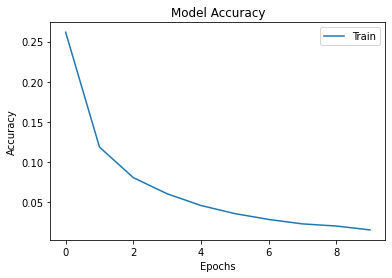

In [13]:
# plot model accuracy

plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()



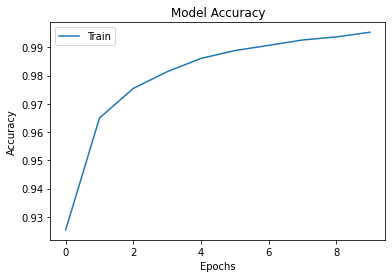

In [14]:
# plot model accuracy

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.show()
